# Initial Analysis

The data set used in this analysis was downloaded from [DANE](https://www.dane.gov.co/index.php/en/) and contains information on [unsatisfied basic needs](https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/necesidades-basicas-insatisfechas-nbi) of Colombians in the last census conducted in the year 2018

## Files

In this repo you will find out three different files:

1. *Base de datos AV.xlsx*: this file is the original information downloaded from the DANE

2. *Antioquia_Analysis.csv*: this file contains information only from Antioquia. This subset of the original information will be used for the initial analyisis

3. *Initial_Analysis.ipynb*: Jupyter notebook to validate the variables independently to know what is the distribution from each one.

In [1]:
import pandas as pd 
import numpy as np
import statistics
import statsmodels.api as sm
from scipy.stats import norm
import pylab

In [2]:
def normalization(df_values):
    """
    Function to create two different normalized values
    from the dataset.
    """
    # Column Name
    col_name = df_values.columns[0]
    # Get Median Value from dataframe
    # val_median = statistics.median(df_values[col_name])
    # Get Standard Deviation from dataframe
    val_stdev = statistics.stdev(df_values[col_name])
    # Normalization of values
    # df_values['normal'] = df_values[col_name].apply(lambda x: (x - val_median)/val_stdev)
    df_values['ln'] = df_values[col_name].apply(lambda x: np.log(x))

    return(df_values)

In [3]:
def hist_plot(df_values):
    """
    Function to plot the histogram for variable values
    """
    df_values.hist(alpha=0.5, figsize=(15, 5), bins=20)

In [4]:
df_analysis = pd.read_csv("Antioquia_Analisis.csv")
df_analysis

,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Prop de Personas en NBI (%),Prop de Personas en miseria,Componente vivienda,Componente Servicios,Componente Hacinamiento,Componente Inasistencia,Componente dependencia económica
0,5,ANTIOQUIA,1,MEDELLÍN,5.23,0.42,0.28,0.19,1.56,1.61,2.05
1,5,ANTIOQUIA,2,ABEJORRAL,13.96,1.37,0.38,0.50,2.66,1.24,10.68
2,5,ANTIOQUIA,4,ABRIAQUÍ,11.63,1.21,1.73,1.59,2.34,0.61,6.96
3,5,ANTIOQUIA,21,ALEJANDRÍA,12.68,0.89,0.71,0.08,1.99,0.89,9.91
4,5,ANTIOQUIA,30,AMAGÁ,9.66,0.94,0.53,0.28,2.37,1.91,5.59
...,...,...,...,...,...,...,...,...,...,...,...
120,5,ANTIOQUIA,885,YALÍ,21.78,5.44,10.72,2.66,4.92,1.57,8.77
121,5,ANTIOQUIA,887,YARUMAL,11.75,1.27,0.88,0.66,2.32,1.34,7.97
122,5,ANTIOQUIA,890,YOLOMBÓ,16.12,3.26,2.29,1.87,5.59,1.81,8.17
123,5,ANTIOQUIA,893,YONDÓ,26.01,6.42,17.60,3.88,2.09,2.80,7.56


# Variable Analysis: Prop de Personas en NBI (%)

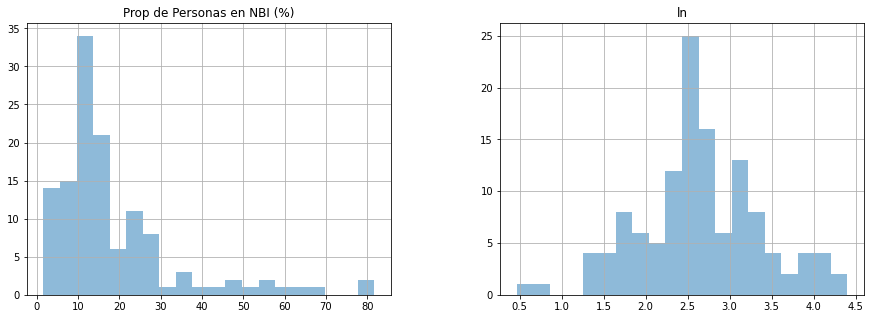

In [5]:
df_prop_personas_nbi = df_analysis[['Prop de Personas en NBI (%)']].copy()
df_prop_personas_nbi = normalization(df_prop_personas_nbi)

hist_plot(df_prop_personas_nbi)

# Variable Analysis: Prop de Personas en miseria

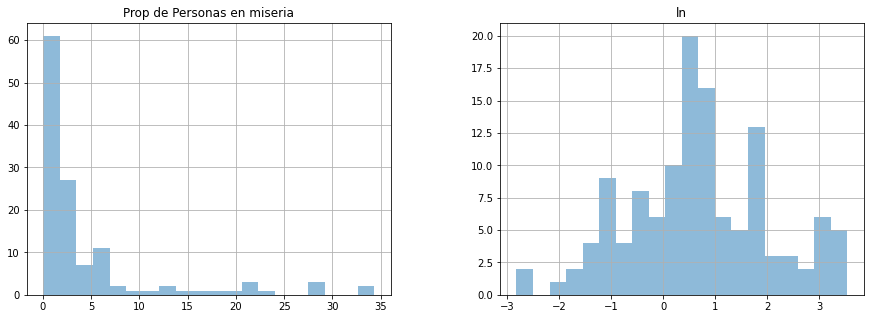

In [6]:
df_prop_personas_miseria = df_analysis[['Prop de Personas en miseria']].copy()
df_prop_personas_miseria = normalization(df_prop_personas_miseria)

hist_plot(df_prop_personas_miseria)

# Variable Analysis: Componente vivienda

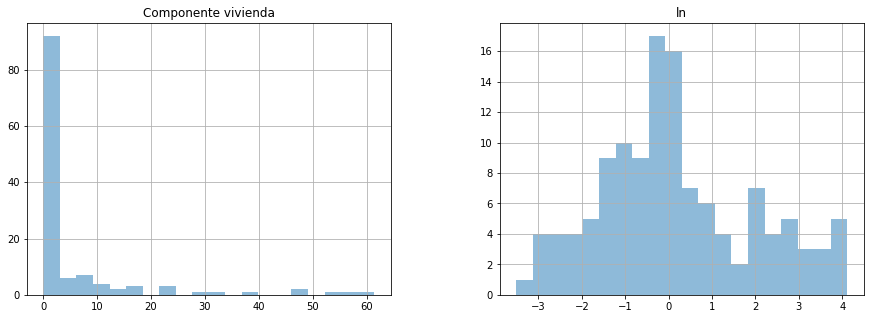

In [8]:
df_componente_vivienda = df_analysis[['Componente vivienda']].copy()
df_componente_vivienda = normalization(df_componente_vivienda)

hist_plot(df_componente_vivienda)

# Variable Analysis: Componente Servicios

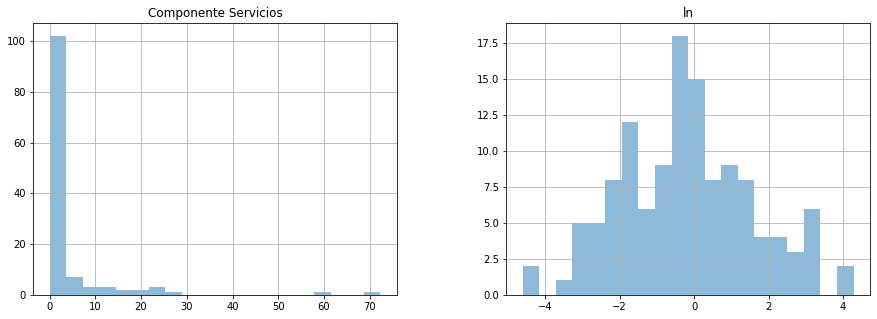

In [10]:
df_componente_servicios = df_analysis[['Componente Servicios']].copy()
df_componente_servicios = normalization(df_componente_servicios)

hist_plot(df_componente_servicios)

# Variable Analysis: Componente Hacinamiento

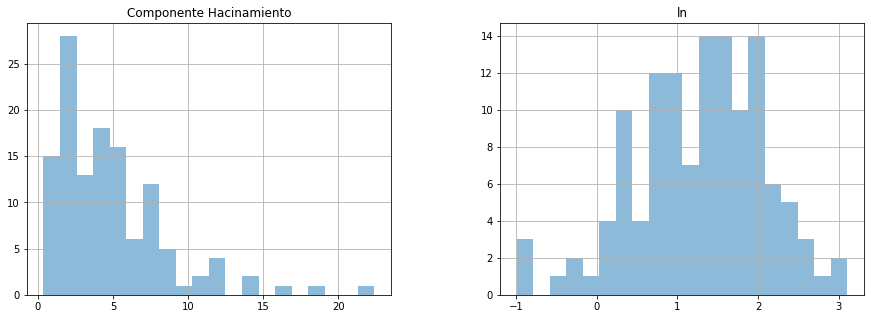

In [12]:
df_componente_hacinamiento = df_analysis[['Componente Hacinamiento']].copy()
df_componente_hacinamiento = normalization(df_componente_hacinamiento)

hist_plot(df_componente_hacinamiento)

# Variable Analysis: Componente Inasistencia

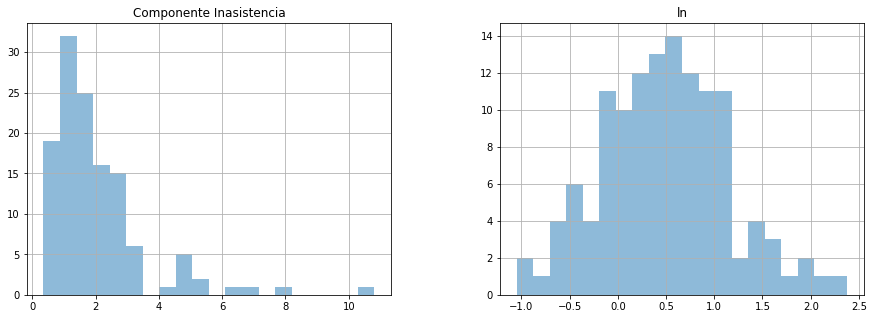

In [14]:
df_componente_inasistencia = df_analysis[['Componente Inasistencia']].copy()
df_componente_inasistencia = normalization(df_componente_inasistencia)

hist_plot(df_componente_inasistencia)

# Variable Analysis: Componente dependencia económica

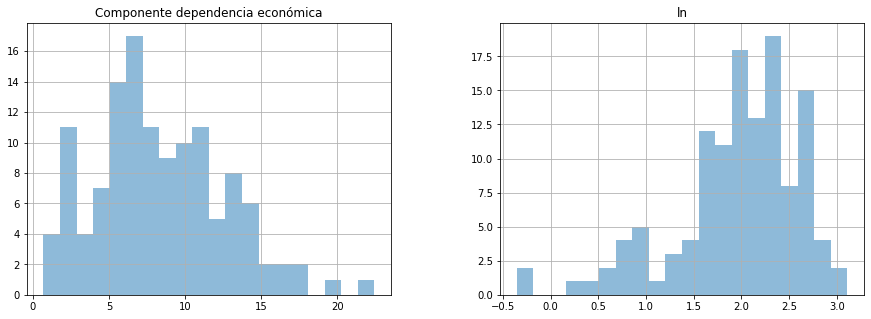

In [16]:
df_comp_dependencia_economica = df_analysis[['Componente dependencia económica']].copy()
df_comp_dependencia_economica = normalization(df_comp_dependencia_economica)

hist_plot(df_comp_dependencia_economica)